# INFO 2950 Genre Analysis
Clara Lack (cjl276), Nicole Chussid (njc76), Paige Herling (ph422)

## Analysis: Quantify genre based on key metrics

**Goal:** Ultimately, our research question is looking at trends over decades, but genre plays a critical part in defining decades as well. The 70s were the age of disco and the 90s was the peak of grunge rock, as well as hip-hop, for example. Therefore, we may gain more insight by looking at how our key metrics track with genres, then take a look at what genres were popular in each decade.

Part 1:

In [1]:
## data manipulation and plotting
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from collections import Counter
from ast import literal_eval

## modelling
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

## significance testing
from sklearn.linear_model import LinearRegression
from scipy import stats
from scipy.stats import poisson, ttest_ind

In [2]:
data = pd.read_csv('data.csv')
data_w_genres = pd.read_csv('data_w_genres.csv')
data_by_genres = pd.read_csv('data_by_genres.csv')

In [3]:
#create a dataframe genres that matches artists to genre by taking only the first artist
# i.e. not including features which can cross genre

all_artists = data.copy()
all_artists['artists'] = all_artists['artists'].map(lambda x: literal_eval(x))
all_artists['artists'] = all_artists['artists'].map(lambda x: x[0])

artists_count = all_artists.groupby('artists').count().iloc[:,0]
artists_count = artists_count.reset_index()
artists_count.columns = ['artists', 'count']

all_artists = pd.merge(all_artists, artists_count, on='artists')
all_artists['count'] = all_artists['count'].astype(int)
all_artists = all_artists[all_artists['count'] >= 50]

genres = pd.merge(all_artists, data_w_genres, on='artists')

In [4]:
#if an artist is categorized under multiple genres, separate each into a new row

multiple_genres = genres.assign(genres=genres.genres.str.split(',')).explode('genres')
multiple_genres['genres'] = multiple_genres['genres'].map(lambda x: re.sub(r'\W+', '', x))

In [5]:
#get rid of non-categorized data

multiple_genres = multiple_genres[multiple_genres.genres != '']

In [6]:
#sort genre by year

genres_year = multiple_genres.groupby('year')['genres'].apply(list)
genres_year = genres_year.reset_index()

In [7]:
genres_year['most_common'] = genres_year['genres'].map(lambda x: Counter(x).most_common(1)[0][0])
genres_year['count_mc'] = genres_year['genres'].map(lambda x: Counter(x).most_common(1)[0][1])  

In [8]:
total_year = all_artists.groupby('year').count().iloc[:,1]
total_year = total_year.reset_index()
total_year.columns = ['year', 'total']

In [9]:
genres_year = pd.merge(genres_year, total_year, on='year')

In [10]:
genres_year['perc_mc'] = genres_year['count_mc'] / genres_year['total']

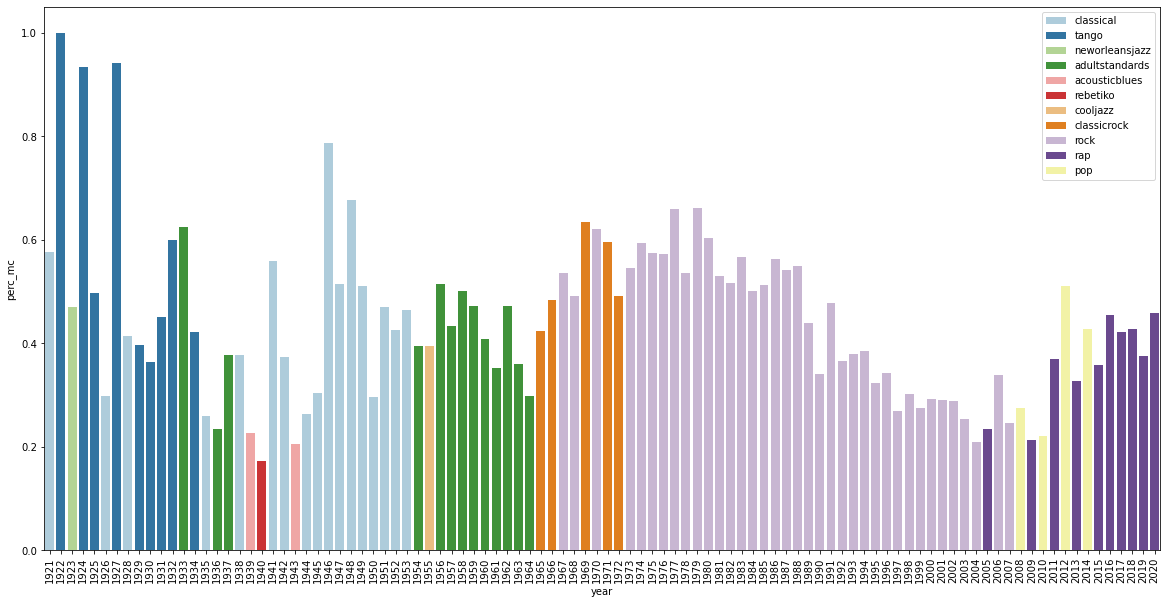

In [11]:
fig,ax = plt.subplots()
fig.set_size_inches(20,10)
ax = sns.barplot(x='year',y='perc_mc',hue='most_common', data=genres_year, dodge=False, palette='Paired')
ax.legend(loc='upper right')
plt.xticks(rotation=90)
plt.show()

Part 2:

In [12]:
multiple_genres = multiple_genres[['genres', 'duration_ms_x', 'tempo_y', 'loudness_y', 'key_x', 'valence_y', 'acousticness_x', 'instrumentalness_x', 'liveness_x','explicit']]
multiple_genres.head()

,genres,duration_ms_x,tempo_y,loudness_y,key_x,valence_y,acousticness_x,instrumentalness_x,liveness_x,explicit
0,classical,282133,98.447067,-22.831075,8,0.277442,0.994,0.901,0.0763,0
0,earlyromanticera,282133,98.447067,-22.831075,8,0.277442,0.994,0.901,0.0763,0
1,classical,167333,98.447067,-22.831075,5,0.277442,0.992,0.883,0.0954,0
1,earlyromanticera,167333,98.447067,-22.831075,5,0.277442,0.992,0.883,0.0954,0
2,classical,118093,98.447067,-22.831075,10,0.277442,0.995,0.937,0.0791,0


In [13]:
multiple_genres = multiple_genres.rename(columns={'duration_ms_x':'duration','tempo_y':'tempo','loudness_y':'volume','key_x':'key','valence_y':'valence','acousticness_x':'acoustic', 'instrumentalness_x':'instrumental', 'liveness_x':'live'})
multiple_genres.head()

,genres,duration,tempo,volume,key,valence,acoustic,instrumental,live,explicit
0,classical,282133,98.447067,-22.831075,8,0.277442,0.994,0.901,0.0763,0
0,earlyromanticera,282133,98.447067,-22.831075,8,0.277442,0.994,0.901,0.0763,0
1,classical,167333,98.447067,-22.831075,5,0.277442,0.992,0.883,0.0954,0
1,earlyromanticera,167333,98.447067,-22.831075,5,0.277442,0.992,0.883,0.0954,0
2,classical,118093,98.447067,-22.831075,10,0.277442,0.995,0.937,0.0791,0


In [14]:
multiple_genres.loc[:, 'is_classical'] = pd.get_dummies(multiple_genres['genres'])['classical']
multiple_genres.loc[:, 'is_tango'] = pd.get_dummies(multiple_genres['genres'])['tango']
multiple_genres.loc[:, 'is_neworleansjazz'] = pd.get_dummies(multiple_genres['genres'])['neworleansjazz']
multiple_genres.loc[:, 'is_adultstandards'] = pd.get_dummies(multiple_genres['genres'])['adultstandards']
multiple_genres.loc[:, 'is_acousticblues'] = pd.get_dummies(multiple_genres['genres'])['acousticblues']
multiple_genres.loc[:, 'is_rebetiko'] = pd.get_dummies(multiple_genres['genres'])['rebetiko']
multiple_genres.loc[:, 'is_cooljazz'] = pd.get_dummies(multiple_genres['genres'])['cooljazz']
multiple_genres.loc[:, 'is_classicrock'] = pd.get_dummies(multiple_genres['genres'])['classicrock']
multiple_genres.loc[:, 'is_rock'] = pd.get_dummies(multiple_genres['genres'])['rock']
multiple_genres.loc[:, 'is_rap'] = pd.get_dummies(multiple_genres['genres'])['rap']
multiple_genres.loc[:, 'is_pop'] = pd.get_dummies(multiple_genres['genres'])['pop']

col_list = multiple_genres[['is_classical','is_tango','is_neworleansjazz','is_adultstandards','is_acousticblues','is_rebetiko','is_cooljazz','is_classicrock','is_rock','is_rap','is_pop']]

In [15]:
#key metric 1: duration

model = LinearRegression().fit(col_list, multiple_genres['duration']/60000) #convert duration to minutes instead of ms
predictions = model.predict(col_list)
print(" Classical duration slope:", model.coef_[0], '\n',
     "Tango duration slope:", model.coef_[1], '\n',
     "Neworleansjazz duration slope:", model.coef_[2], '\n',
     "Adultstandards duration slope:", model.coef_[3], '\n',
     "Acousticblues duration slope:", model.coef_[4], '\n',
     "Rebetiko duration slope:", model.coef_[5], '\n',
     "Cooljazz duration slope:", model.coef_[6], '\n',
      "Classicrock duration slope:", model.coef_[7], '\n',
      "Rock duration slope:", model.coef_[8], '\n',
      "Pop duration slope:", model.coef_[9], '\n',
     "Rap duration slope:", model.coef_[10], '\n',)

 Classical duration slope: 0.8633461585075027 
 Tango duration slope: -1.082439221087707 
 Neworleansjazz duration slope: -0.4250455999051372 
 Adultstandards duration slope: -0.689159356288858 
 Acousticblues duration slope: -1.1635460037598901 
 Rebetiko duration slope: -0.79683695528448 
 Cooljazz duration slope: 0.9191830912357744 
 Classicrock duration slope: 0.13697564565722747 
 Rock duration slope: 0.19161352450936953 
 Pop duration slope: 0.031894526605366465 
 Rap duration slope: 0.09590022054917556 



In [16]:
#key metric 2: tempo

model = LinearRegression().fit(col_list, multiple_genres['tempo'])
predictions = model.predict(col_list)
print(" Classical tempo slope:", model.coef_[0], '\n',
     "Tango tempo slope:", model.coef_[1], '\n',
     "Neworleansjazz tempo slope:", model.coef_[2], '\n',
     "Adultstandards tempo slope:", model.coef_[3], '\n',
     "Acousticblues tempo slope:", model.coef_[4], '\n',
     "Rebetiko tempo slope:", model.coef_[5], '\n',
     "Cooljazz tempo slope:", model.coef_[6], '\n',
      "Classicrock tempo slope:", model.coef_[7], '\n',
      "Rock tempo slope:", model.coef_[8], '\n',
      "Pop tempo slope:", model.coef_[9], '\n',
     "Rap tempo slope:", model.coef_[10], '\n',)

 Classical tempo slope: -15.542939294676858 
 Tango tempo slope: 1.3046967489410024 
 Neworleansjazz tempo slope: -2.107636507454286 
 Adultstandards tempo slope: -5.900936426449979 
 Acousticblues tempo slope: -2.2765503810346286 
 Rebetiko tempo slope: -4.194828506943871 
 Cooljazz tempo slope: -4.72016563497273 
 Classicrock tempo slope: 4.824671911192387 
 Rock tempo slope: 5.603082390008397 
 Pop tempo slope: -1.7118366365227915 
 Rap tempo slope: 1.7732053596349473 



In [17]:
#key metric 3: volume

model = LinearRegression().fit(col_list, multiple_genres['volume'])
predictions = model.predict(col_list)
print(" Classical volume slope:", model.coef_[0], '\n',
     "Tango volume slope:", model.coef_[1], '\n',
     "Neworleansjazz volume slope:", model.coef_[2], '\n',
     "Adultstandards volume slope:", model.coef_[3], '\n',
     "Acousticblues volume slope:", model.coef_[4], '\n',
     "Rebetiko volume slope:", model.coef_[5], '\n',
     "Cooljazz volume slope:", model.coef_[6], '\n',
      "Classicrock volume slope:", model.coef_[7], '\n',
      "Rock volume slope:", model.coef_[8], '\n',
      "Pop volume slope:", model.coef_[9], '\n',
     "Rap volume slope:", model.coef_[10], '\n',)

 Classical volume slope: -8.427114267897505 
 Tango volume slope: -2.151731672902211 
 Neworleansjazz volume slope: -1.0529644442425892 
 Adultstandards volume slope: -2.0383862111977065 
 Acousticblues volume slope: -1.2966267146984 
 Rebetiko volume slope: 0.5253170432352026 
 Cooljazz volume slope: -3.3064640697553824 
 Classicrock volume slope: 1.243951730150573 
 Rock volume slope: 2.20186618988539 
 Pop volume slope: 4.818864016733001 
 Rap volume slope: 4.642506956499317 



In [18]:
#key metric 4: key

model = LinearRegression().fit(col_list, multiple_genres['key'])
predictions = model.predict(col_list)
print(" Classical key slope:", model.coef_[0], '\n',
     "Tango key slope:", model.coef_[1], '\n',
     "Neworleansjazz key slope:", model.coef_[2], '\n',
     "Adultstandards key slope:", model.coef_[3], '\n',
     "Acousticblues key slope:", model.coef_[4], '\n',
     "Rebetiko key slope:", model.coef_[5], '\n',
     "Cooljazz key slope:", model.coef_[6], '\n',
      "Classicrock key slope:", model.coef_[7], '\n',
      "Rock key slope:", model.coef_[8], '\n',
      "Pop key slope:", model.coef_[9], '\n',
     "Rap key slope:", model.coef_[10], '\n',)

 Classical key slope: -0.11677142548772987 
 Tango key slope: 0.004526531911296959 
 Neworleansjazz key slope: -0.34864595782741137 
 Adultstandards key slope: 0.011700171813866858 
 Acousticblues key slope: 0.5583854137049851 
 Rebetiko key slope: 0.5338408146594575 
 Cooljazz key slope: -0.2922939004496314 
 Classicrock key slope: -0.07734165739682011 
 Rock key slope: 0.0051011746873415 
 Pop key slope: 0.3211444363370308 
 Rap key slope: 0.020678250897992273 



In [19]:
#key metric 5: valence

model = LinearRegression().fit(col_list, multiple_genres['valence'])
predictions = model.predict(col_list)
print(" Classical valence slope:", model.coef_[0], '\n',
     "Tango valence slope:", model.coef_[1], '\n',
     "Neworleansjazz valence slope:", model.coef_[2], '\n',
     "Adultstandards valence slope:", model.coef_[3], '\n',
     "Acousticblues valence slope:", model.coef_[4], '\n',
     "Rebetiko valence slope:", model.coef_[5], '\n',
     "Cooljazz valence slope:", model.coef_[6], '\n',
      "Classicrock valence slope:", model.coef_[7], '\n',
      "Rock valence slope:", model.coef_[8], '\n',
      "Pop valence slope:", model.coef_[9], '\n',
     "Rap valence slope:", model.coef_[10], '\n',)

 Classical valence slope: -0.26554581753448225 
 Tango valence slope: 0.18909003689482218 
 Neworleansjazz valence slope: 0.03943361853936583 
 Adultstandards valence slope: -0.0700500776840265 
 Acousticblues valence slope: 0.17164516963434812 
 Rebetiko valence slope: 0.17222540175246998 
 Cooljazz valence slope: -0.06719649068760716 
 Classicrock valence slope: 0.04683404210464218 
 Rock valence slope: 0.011910013367308276 
 Pop valence slope: -0.025364654608526816 
 Rap valence slope: -0.028864027150008693 



In [20]:
#key metric 6: acoustic

model = LinearRegression().fit(col_list, multiple_genres['acoustic'])
predictions = model.predict(col_list)
print(" Classical acoustic slope:", model.coef_[0], '\n',
     "Tango acoustic slope:", model.coef_[1], '\n',
     "Neworleansjazz acoustic slope:", model.coef_[2], '\n',
     "Adultstandards acoustic slope:", model.coef_[3], '\n',
     "Acousticblues acoustic slope:", model.coef_[4], '\n',
     "Rebetiko acoustic slope:", model.coef_[5], '\n',
     "Cooljazz acoustic slope:", model.coef_[6], '\n',
      "Classicrock acoustic slope:", model.coef_[7], '\n',
      "Rock acoustic slope:", model.coef_[8], '\n',
      "Pop acoustic slope:", model.coef_[9], '\n',
     "Rap acoustic slope:", model.coef_[10], '\n',)

 Classical acoustic slope: 0.44752902317692667 
 Tango acoustic slope: 0.4785719402671505 
 Neworleansjazz acoustic slope: 0.3247772501083116 
 Adultstandards acoustic slope: 0.2575047415737328 
 Acousticblues acoustic slope: 0.4091400916951319 
 Rebetiko acoustic slope: 0.46015587444702466 
 Cooljazz acoustic slope: 0.28360890713990283 
 Classicrock acoustic slope: -0.1703392701051181 
 Rock acoustic slope: -0.2437457246601665 
 Pop acoustic slope: -0.33059060999364603 
 Rap acoustic slope: -0.25763922363735164 



In [21]:
#key metric 7: instrumental

model = LinearRegression().fit(col_list, multiple_genres['instrumental'])
predictions = model.predict(col_list)
print(" Classical instrumental slope:", model.coef_[0], '\n',
     "Tango instrumental slope:", model.coef_[1], '\n',
     "Neworleansjazz instrumental slope:", model.coef_[2], '\n',
     "Adultstandards instrumental slope:", model.coef_[3], '\n',
     "Acousticblues instrumental slope:", model.coef_[4], '\n',
     "Rebetiko instrumental slope:", model.coef_[5], '\n',
     "Cooljazz instrumental slope:", model.coef_[6], '\n',
      "Classicrock instrumental slope:", model.coef_[7], '\n',
      "Rock instrumental slope:", model.coef_[8], '\n',
      "Pop instrumental slope:", model.coef_[9], '\n',
     "Rap instrumental slope:", model.coef_[10], '\n',)

 Classical instrumental slope: 0.4020945202117548 
 Tango instrumental slope: 0.3125425517548933 
 Neworleansjazz instrumental slope: 0.036553219440689774 
 Adultstandards instrumental slope: -0.016489729309421882 
 Acousticblues instrumental slope: -0.07335081422943747 
 Rebetiko instrumental slope: 0.18306860024389748 
 Cooljazz instrumental slope: 0.2056317744956493 
 Classicrock instrumental slope: -0.07024753309561721 
 Rock instrumental slope: -0.05573156235016655 
 Pop instrumental slope: -0.13644677023439178 
 Rap instrumental slope: -0.14240575497437788 



In [22]:
#key metric 8: live

model = LinearRegression().fit(col_list, multiple_genres['live'])
predictions = model.predict(col_list)
print(" Classical live slope:", model.coef_[0], '\n',
     "Tango live slope:", model.coef_[1], '\n',
     "Neworleansjazz live slope:", model.coef_[2], '\n',
     "Adultstandards live slope:", model.coef_[3], '\n',
     "Acousticblues live slope:", model.coef_[4], '\n',
     "Rebetiko live slope:", model.coef_[5], '\n',
     "Cooljazz live slope:", model.coef_[6], '\n',
      "Classicrock live slope:", model.coef_[7], '\n',
      "Rock live slope:", model.coef_[8], '\n',
      "Pop live slope:", model.coef_[9], '\n',
     "Rap live slope:", model.coef_[10], '\n',)

 Classical live slope: -0.022549831674967467 
 Tango live slope: -0.02327021389531604 
 Neworleansjazz live slope: 0.03635845984578165 
 Adultstandards live slope: -0.010136854073776359 
 Acousticblues live slope: -0.03033081575702418 
 Rebetiko live slope: -0.02015848195316304 
 Cooljazz live slope: -0.01994563809220421 
 Classicrock live slope: 0.028089221496186718 
 Rock live slope: 0.02662532100117667 
 Pop live slope: 0.00546346331724191 
 Rap live slope: -0.030423620564826503 



In [23]:
#key metric 9: explicit

model = LinearRegression().fit(col_list, multiple_genres['explicit'])
predictions = model.predict(col_list)
print(" Classical explicit slope:", model.coef_[0], '\n',
     "Tango explicit slope:", model.coef_[1], '\n',
     "Neworleansjazz explicit slope:", model.coef_[2], '\n',
     "Adultstandards explicit slope:", model.coef_[3], '\n',
     "Acousticblues explicit slope:", model.coef_[4], '\n',
     "Rebetiko explicit slope:", model.coef_[5], '\n',
     "Cooljazz explicit slope:", model.coef_[6], '\n',
      "Classicrock explicit slope:", model.coef_[7], '\n',
      "Rock explicit slope:", model.coef_[8], '\n',
      "Pop explicit slope:", model.coef_[9], '\n',
     "Rap explicit slope:", model.coef_[10], '\n',)

 Classical explicit slope: -0.048552748488085364 
 Tango explicit slope: -0.048552748488066365 
 Neworleansjazz explicit slope: -0.04855274848809901 
 Adultstandards explicit slope: -0.0485527484880904 
 Acousticblues explicit slope: -0.04855274848811254 
 Rebetiko explicit slope: -0.048552748488111266 
 Cooljazz explicit slope: -0.04855274848810474 
 Classicrock explicit slope: -0.047102920178291506 
 Rock explicit slope: -0.021227072150395203 
 Pop explicit slope: 0.7336681066334281 
 Rap explicit slope: 0.07400214173146355 



In [24]:
tango = multiple_genres[multiple_genres.genres == 'tango']
acousticblues = multiple_genres[multiple_genres.genres == 'acousticblues']
classical = multiple_genres[multiple_genres.genres == 'classical']
cooljazz = multiple_genres[multiple_genres.genres == 'cooljazz']
pop = multiple_genres[multiple_genres.genres == 'pop']
rap = multiple_genres[multiple_genres.genres == 'rap']

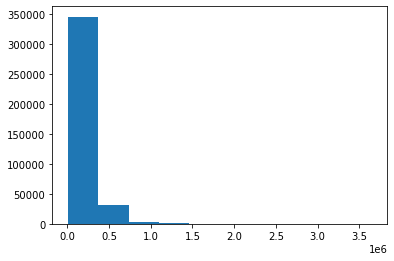

In [25]:
plt.hist(multiple_genres['duration'])
plt.show()

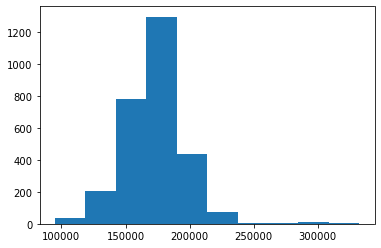

In [26]:
plt.hist(tango['duration'])
plt.show()

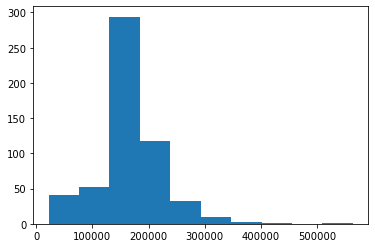

In [27]:
plt.hist(acousticblues['duration'])
plt.show()

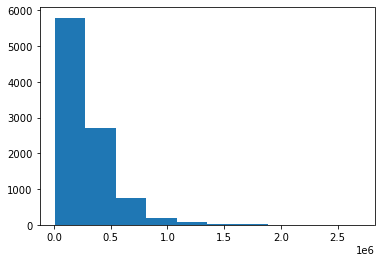

In [28]:
plt.hist(classical['duration'])
plt.show()

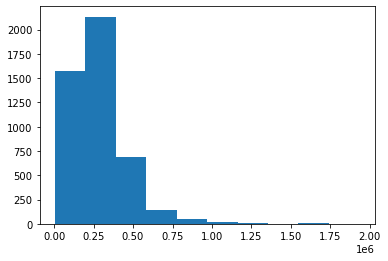

In [29]:
plt.hist(cooljazz['duration'])
plt.show()

In [30]:
#Duration tests

#Test null that tango has same mean duration as all other genres
sampleTotal = np.random.normal(np.mean(multiple_genres['duration']), np.std(multiple_genres['duration']), 1000)
sampleTango = np.random.normal(np.mean(tango['duration']), np.std(tango['duration']), 1000)
ttest = ttest_ind(sampleTotal, sampleTango)
print("The p-value for tango is", ttest[1])

#Test null that acoustic blues has same mean duration as all other genres
sampleTotal = np.random.normal(np.mean(multiple_genres['duration']), np.std(multiple_genres['duration']), 1000)
sampleAcousticblues = np.random.normal(np.mean(classical['duration']), np.std(acousticblues['duration']), 1000)
ttest = ttest_ind(sampleTotal, sampleAcousticblues)
print("The p-value for acousticblues is", ttest[1])

#Test null that classical has same mean duration as all other genres
sampleTotal = np.random.normal(np.mean(multiple_genres['duration']), np.std(multiple_genres['duration']), 1000)
sampleClassical = np.random.normal(np.mean(classical['duration']), np.std(classical['duration']), 1000)
ttest = ttest_ind(sampleTotal, sampleClassical)
print("The p-value for classical is", ttest[1])

#Test null that cool jazz has same mean duration as all other genres
sampleTotal = np.random.normal(np.mean(multiple_genres['duration']), np.std(multiple_genres['duration']), 1000)
sampleCooljazz = np.random.normal(np.mean(cooljazz['duration']), np.std(cooljazz['duration']), 1000)
ttest = ttest_ind(sampleTotal, sampleCooljazz)
print("The p-value for cool jazz is", ttest[1])

The p-value for tango is 1.1710552391701611e-59
The p-value for acousticblues is 6.998669802818649e-24
The p-value for classical is 1.358467264476611e-12
The p-value for cool jazz is 1.0565558268216325e-11


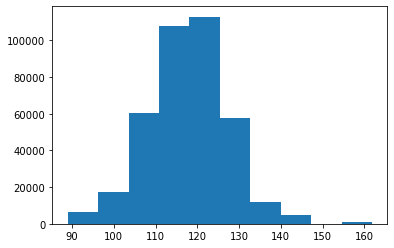

In [31]:
plt.hist(multiple_genres['tempo'])
plt.show()

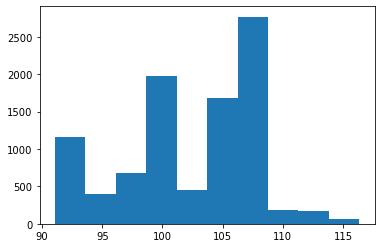

In [32]:
plt.hist(classical['tempo'])
plt.show()

In [33]:
#Test null that classical has same mean tempo as all other genres
sampleTotal = np.random.normal(np.mean(multiple_genres['tempo']), np.std(multiple_genres['tempo']), 1000)
sampleClassical = np.random.normal(np.mean(classical['tempo']), np.std(classical['tempo']), 1000)
ttest = ttest_ind(sampleTotal, sampleClassical)
print("The p-value for classical is", ttest[1])

The p-value for classical is 5.420416808732714e-273


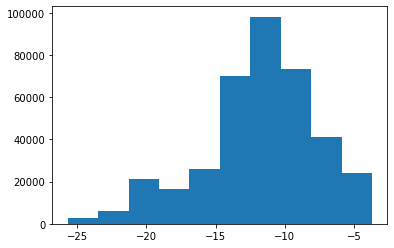

In [34]:
plt.hist(multiple_genres['volume'])
plt.show()

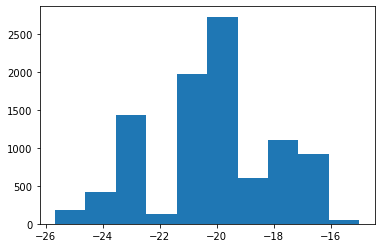

In [35]:
plt.hist(classical['volume'])
plt.show()

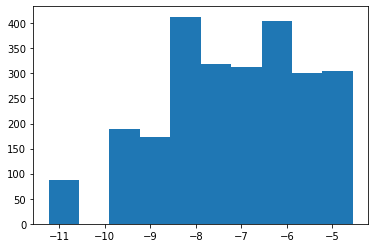

In [36]:
plt.hist(pop['volume'])
plt.show()

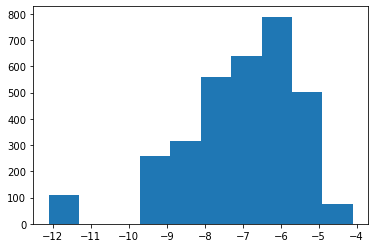

In [38]:
plt.hist(rap['volume'])
plt.show()

In [39]:
#Volume tests

#Test null that classical has same mean volume as all other genres
sampleTotal = np.random.normal(np.mean(multiple_genres['volume']), np.std(multiple_genres['volume']), 1000)
sampleClassical = np.random.normal(np.mean(classical['volume']), np.std(classical['volume']), 1000)
ttest = ttest_ind(sampleTotal, sampleClassical)
print("The p-value for classical is", ttest[1])

#Test null that pop has same mean volume as all other genres
sampleTotal = np.random.normal(np.mean(multiple_genres['volume']), np.std(multiple_genres['volume']), 1000)
samplePop = np.random.normal(np.mean(pop['volume']), np.std(pop['volume']), 1000)
ttest = ttest_ind(sampleTotal, sampleClassical)
print("The p-value for pop is", ttest[1])

#Test null that rap has same mean volume as all other genres
sampleTotal = np.random.normal(np.mean(multiple_genres['volume']), np.std(multiple_genres['volume']), 1000)
sampleRap = np.random.normal(np.mean(rap['volume']), np.std(rap['volume']), 1000)
ttest = ttest_ind(sampleTotal, sampleClassical)
print("The p-value for rap is", ttest[1])

The p-value for classical is 0.0
The p-value for pop is 0.0
The p-value for rap is 0.0
